In [1]:
library('tidymodels')

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.9
✔ dials        1.2.0     ✔ rsample      1.2.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.4.4     ✔ tidyr        1.3.1
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.3.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.3.0

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



In [2]:
fake_data = readr::read_csv('fake-data.csv', col_types = readr::cols())

fake_data |> head()

x,y,z
<dbl>,<dbl>,<chr>
61.91745,86.78322,a
43.54914,124.83690,a
63.63517,91.78090,a
88.77410,155.97130,a
38.71183,177.28135,a
66.33930,176.83391,a


`geom_smooth()` using formula = 'y ~ x'


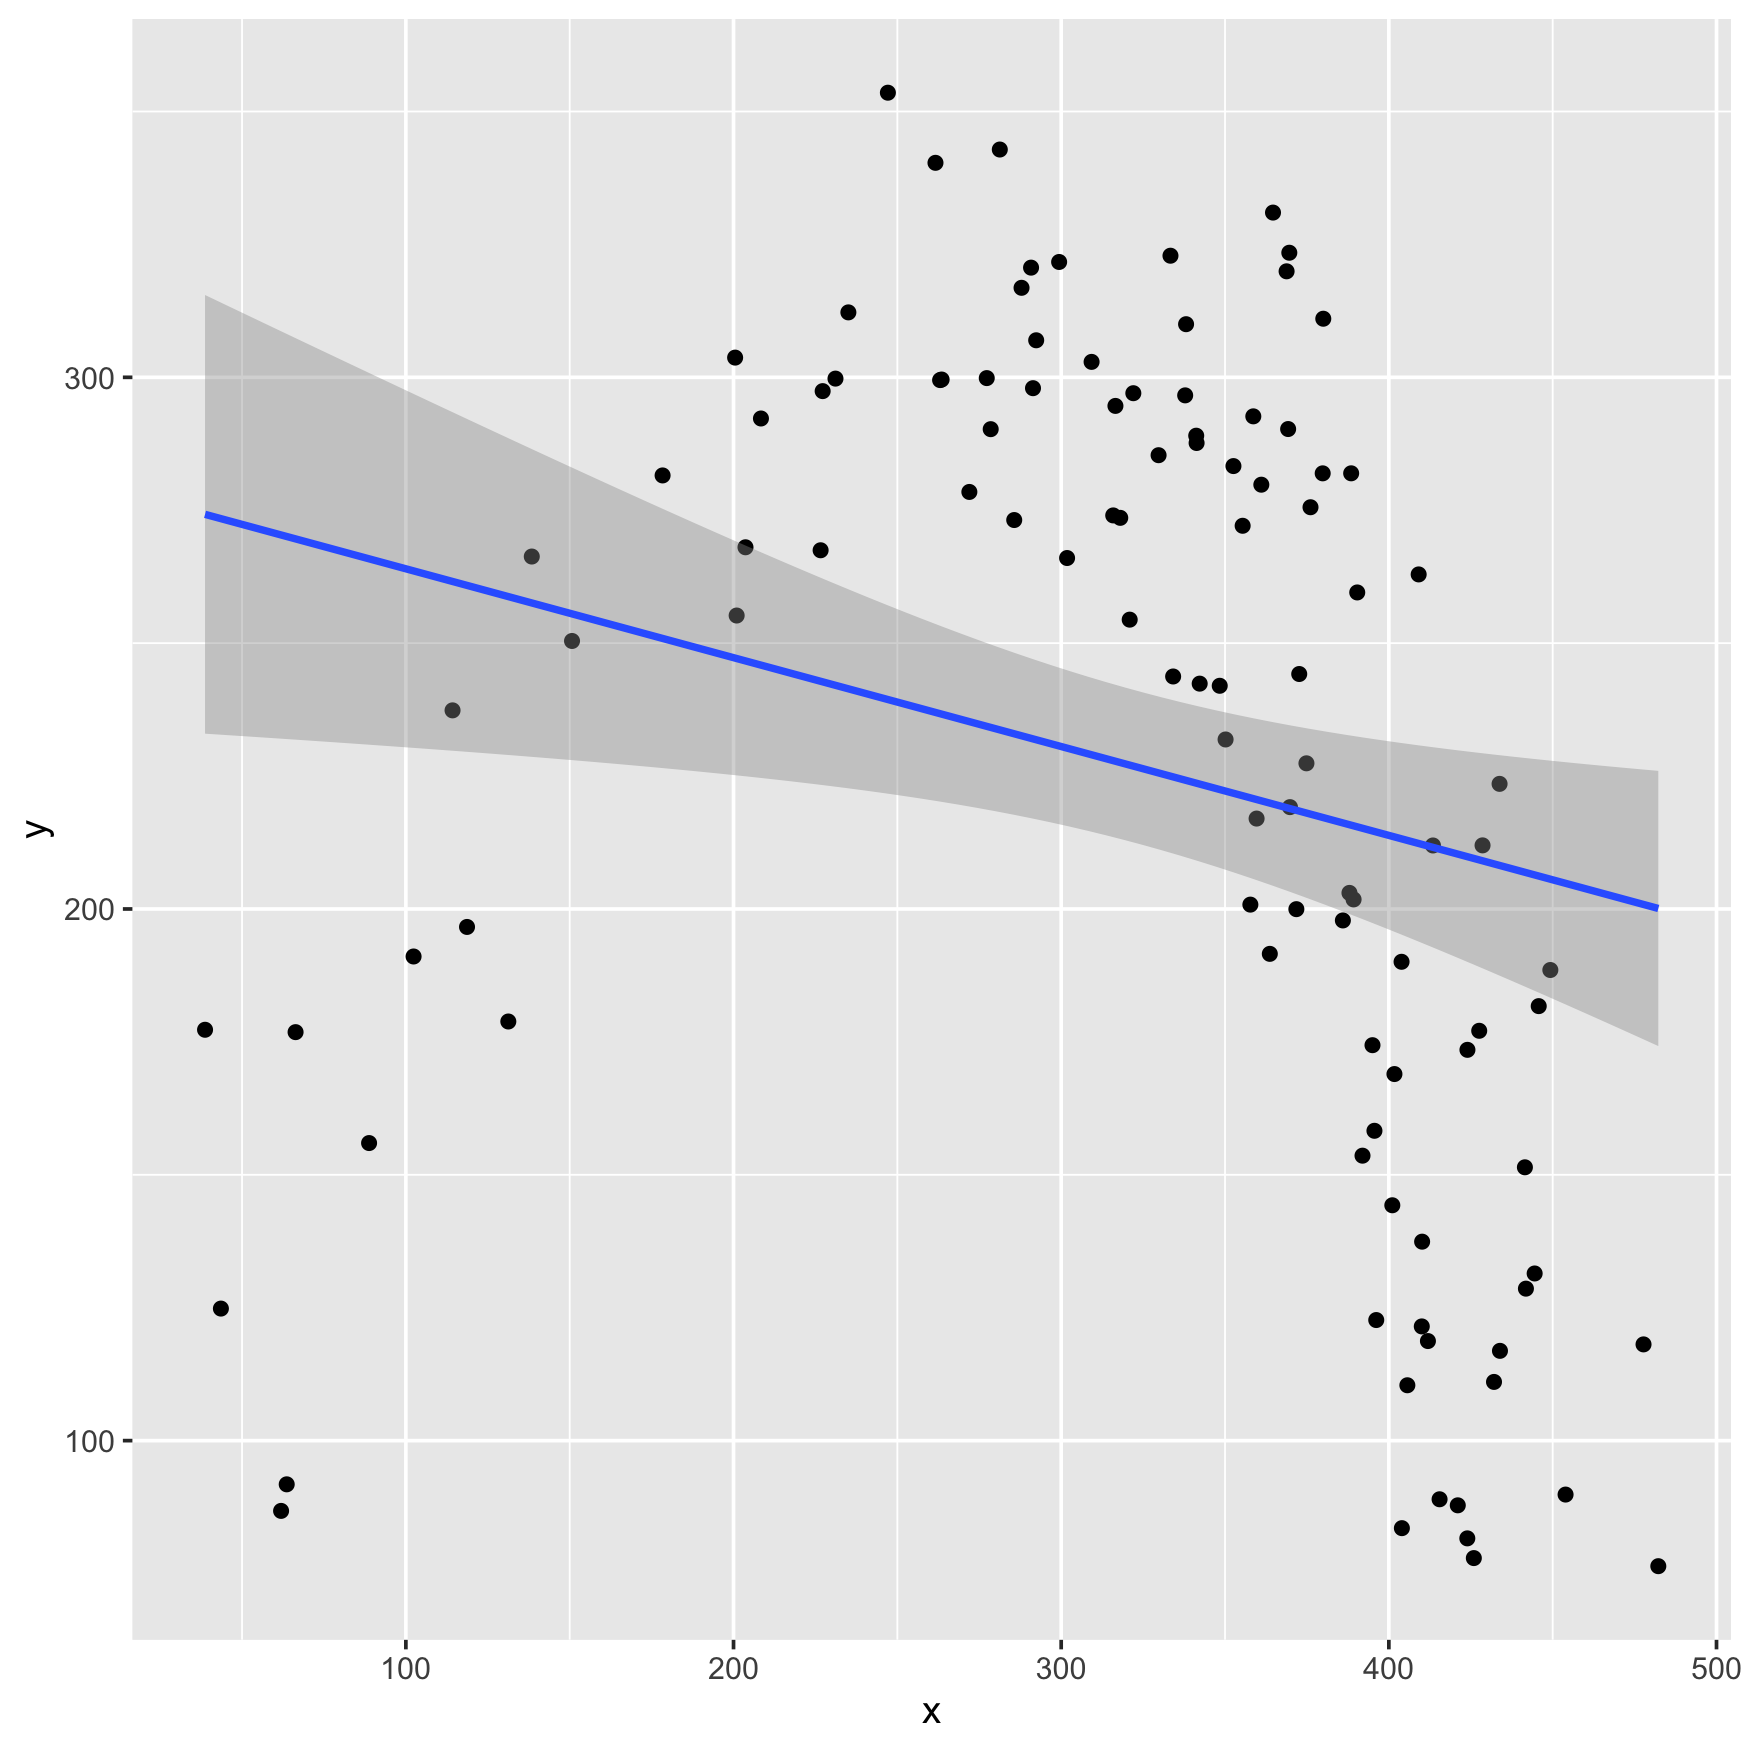

In [3]:
options(repr.plot.res = 250)

ggplot(fake_data, aes(y = y, x = x)) +
    geom_point() +
    stat_smooth(method = "lm")

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


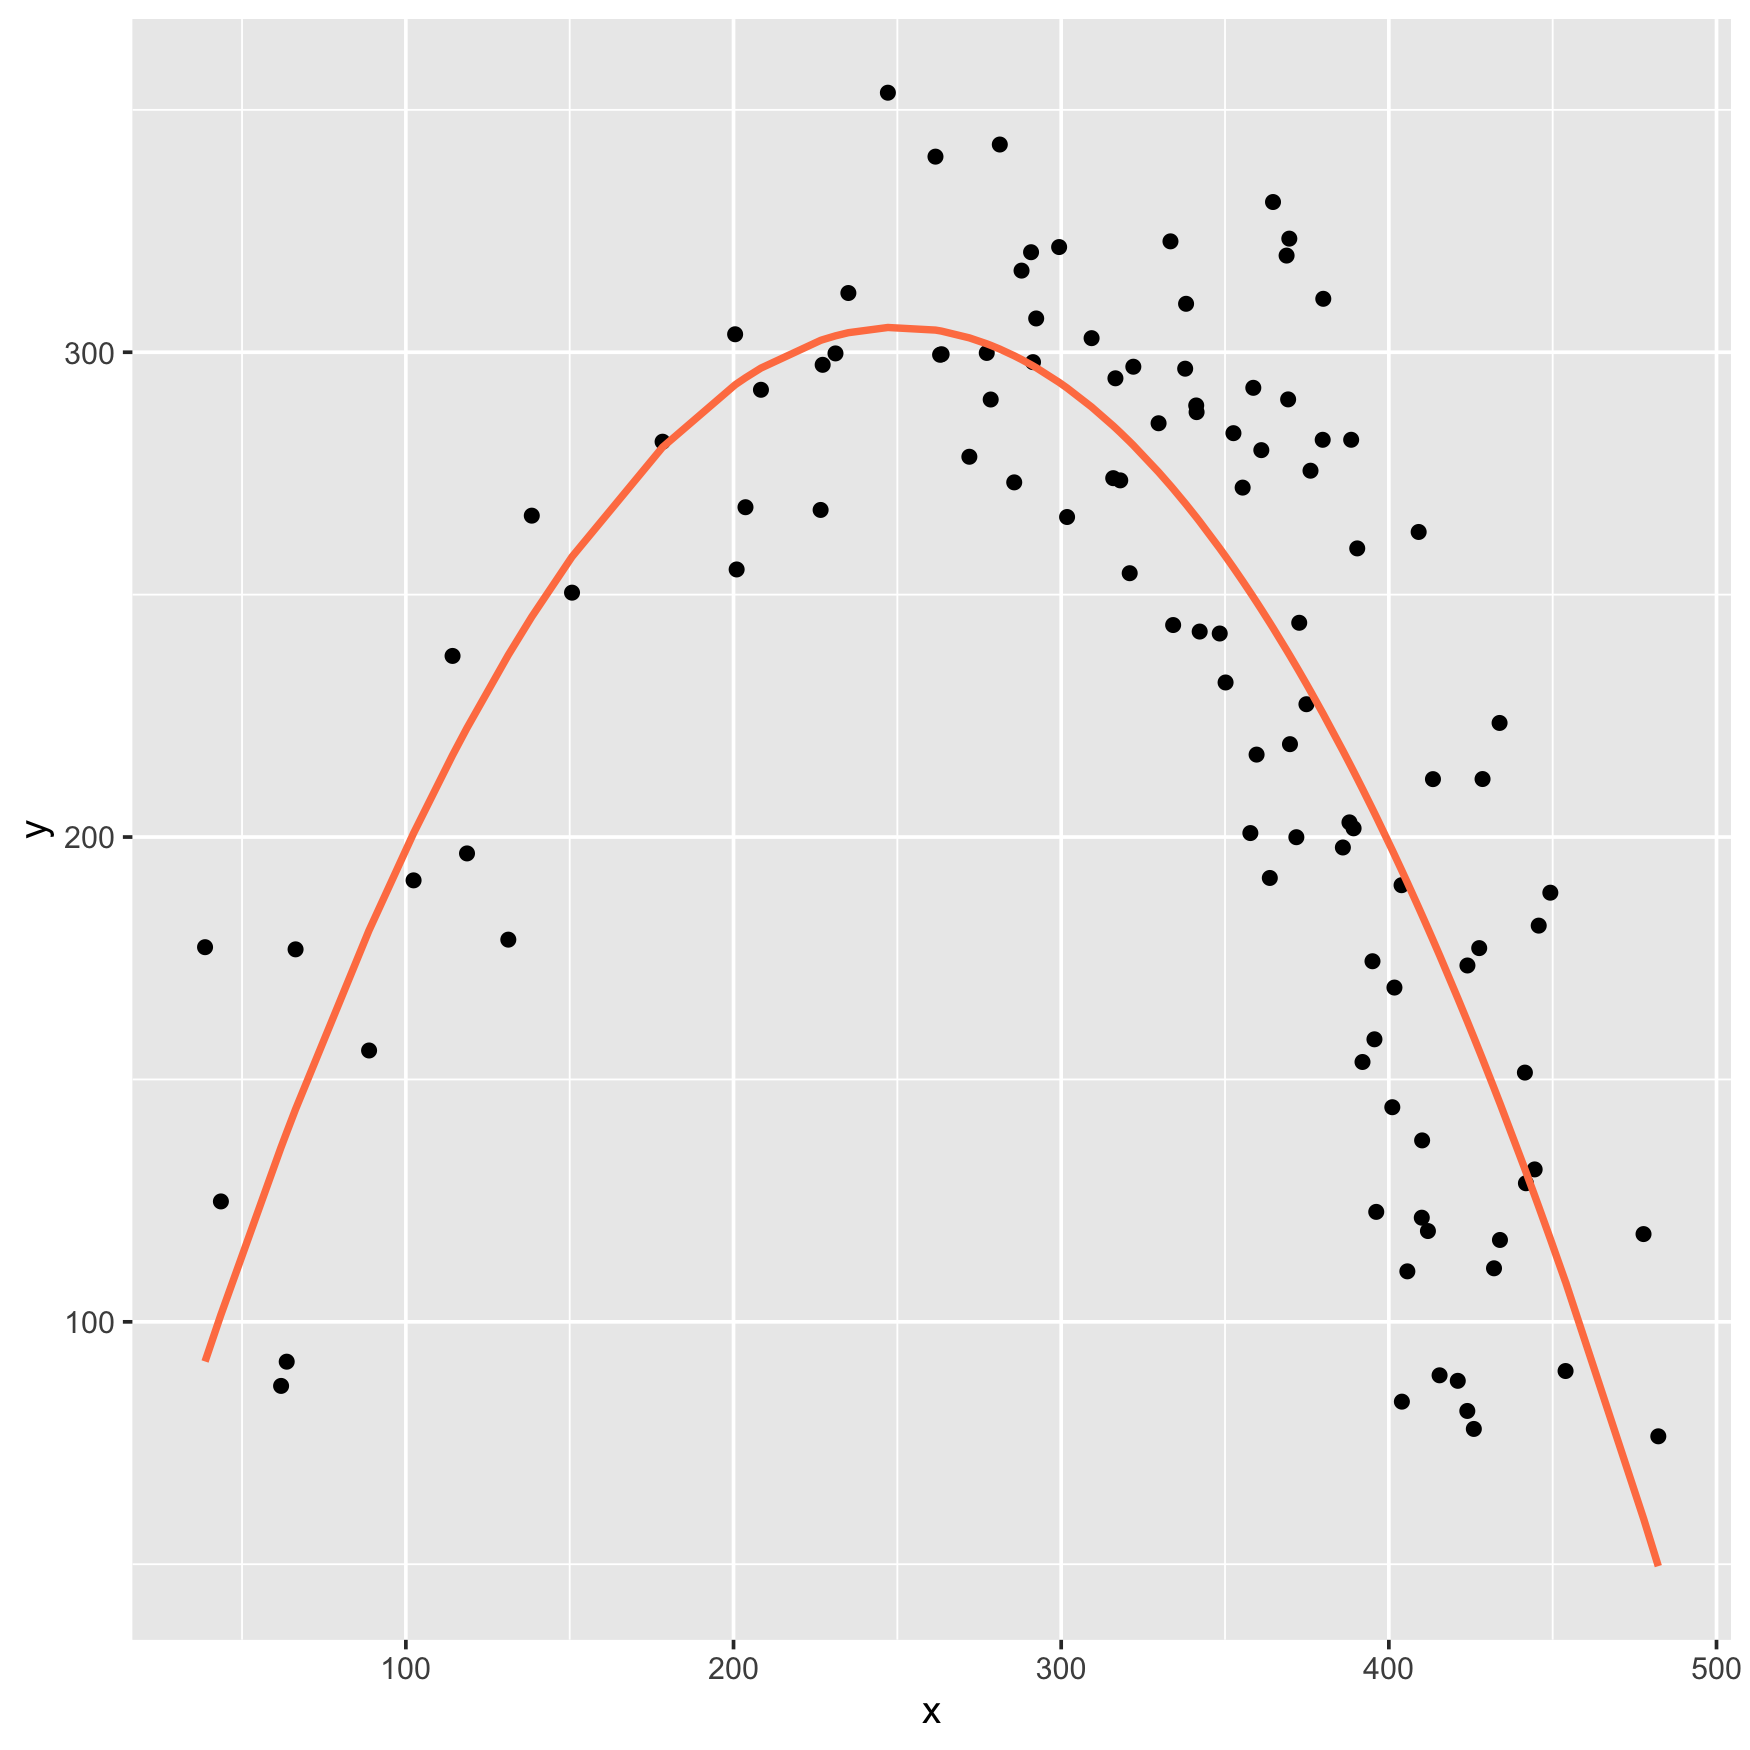

In [4]:
mod = lm(y ~ x + I(x^2), data = fake_data)

fake_data |>
    mutate(.pred = predict(mod, fake_data)) |>
ggplot(aes(x = x, y = y)) + 
    geom_point() +
    geom_line(aes(y = .pred), color = 'coral', size = 1)

In [5]:
rec = recipe(y ~ x, data = fake_data) |>
    step_poly(x, degree = 2, options = c(raw = TRUE)) |>
    prep()

rec |> juice() |> bind_cols(fake_data |> select(x)) |> head()

Warning message in opts$degree <- x$degree:
“Coercing LHS to a list”


y,x_poly_1,x_poly_2,x
<dbl>,<dbl>,<dbl>,<dbl>
86.78322,61.91745,3833.770,61.91745
124.83690,43.54914,1896.528,43.54914
91.78090,63.63517,4049.435,63.63517
155.97130,88.77410,7880.840,88.77410
177.28135,38.71183,1498.606,38.71183
176.83391,66.33930,4400.902,66.33930


In [6]:
61.9 ** 2

[1] 3831.61

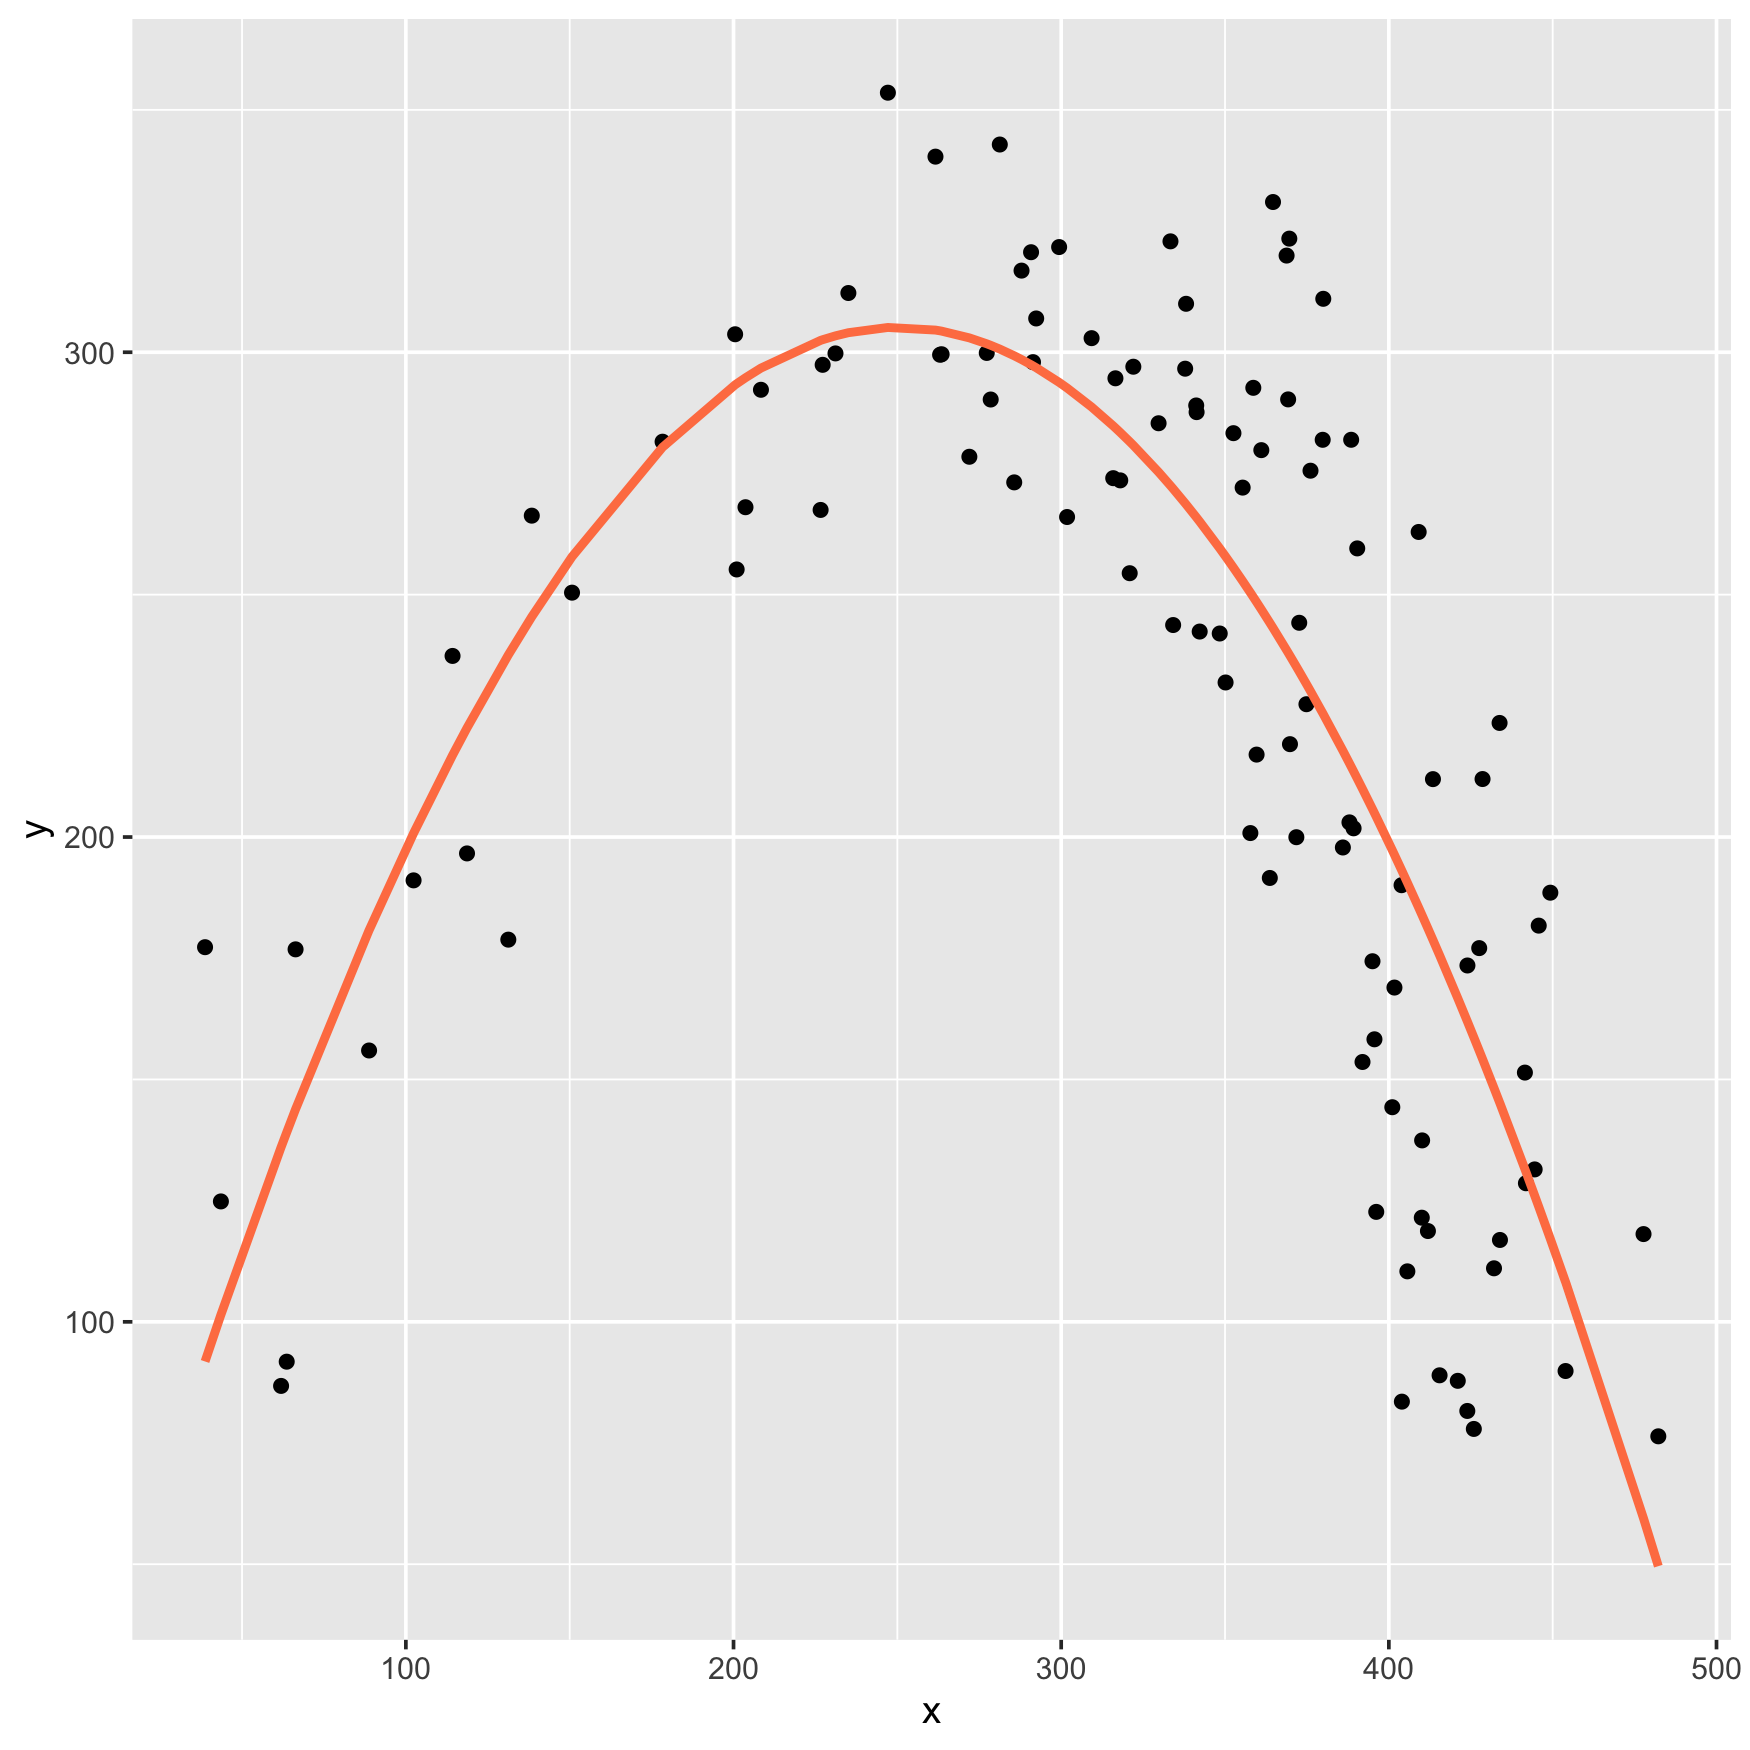

In [7]:
mod = linear_reg() |> set_engine('lm')

mod_fit = mod |> fit(y ~ ., data = rec |> juice())

predict(mod_fit, rec |> juice()) |> 
    bind_cols(fake_data) |> 
ggplot(aes(x = x, y = y)) +
    geom_point() +
    geom_line(aes(y = .pred), linewidth = 1.2, color = 'coral')

In [8]:
fake_data2 = readr::read_csv('fake-data2.csv', show_col_types = F)

fake_data2 |> head()

x,y,z
<dbl>,<dbl>,<chr>
16.28776,240.7770,a
34.67816,207.9136,a
27.51155,228.2944,a
39.16548,226.3843,a
55.36128,214.9069,a
42.40213,283.3720,a


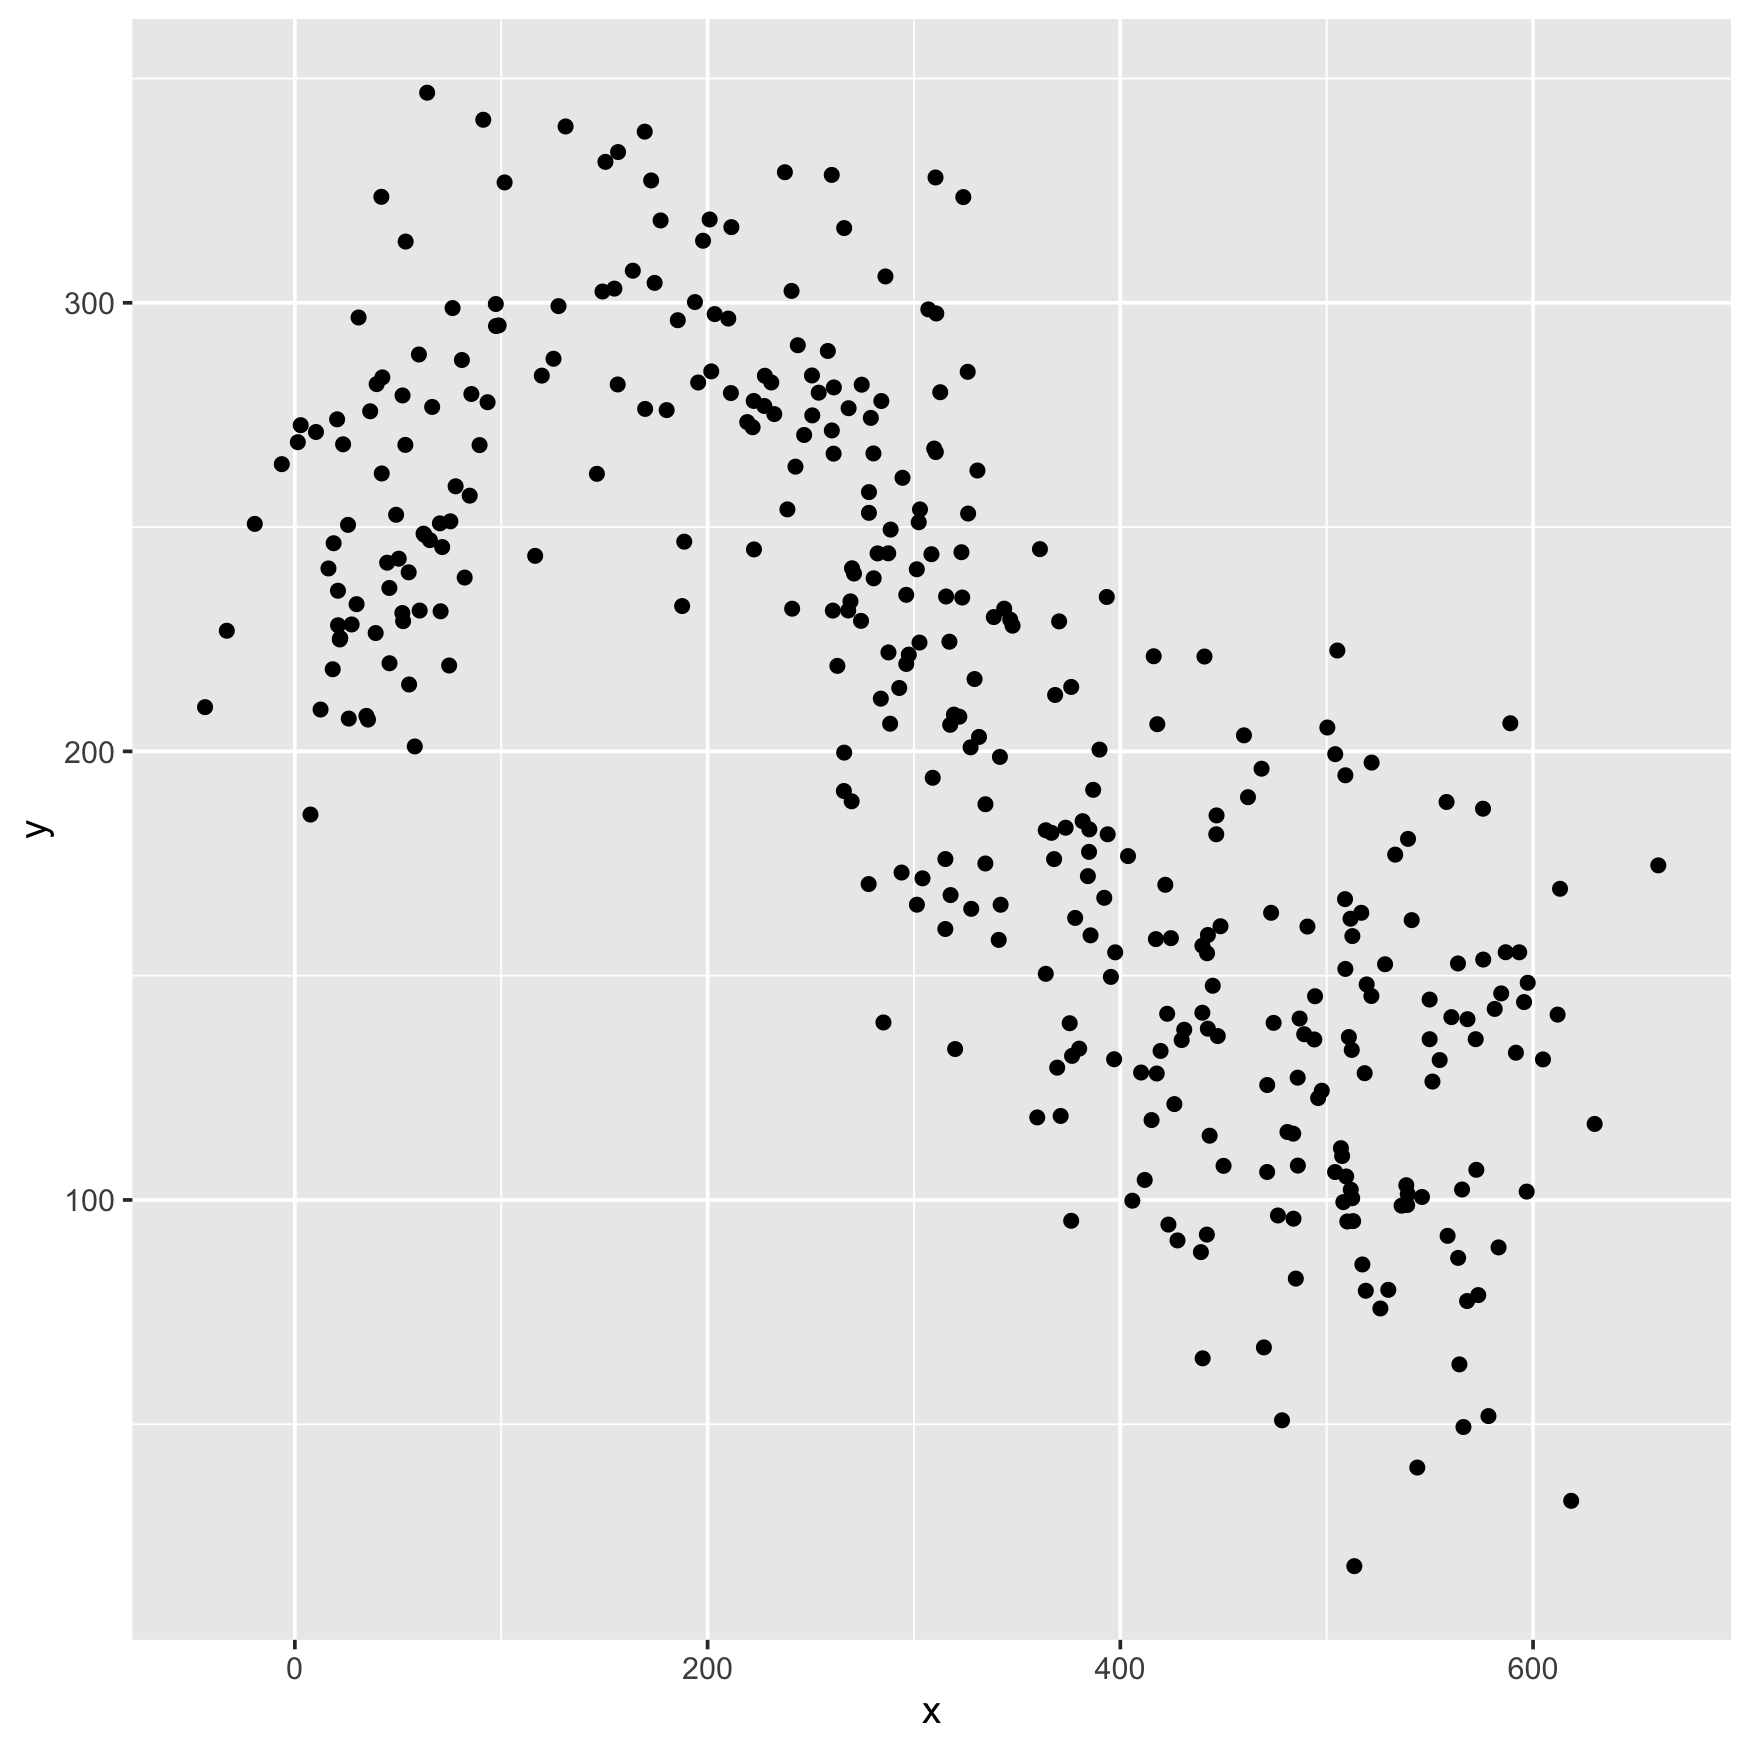

In [9]:
ggplot(fake_data2, aes(x = x, y = y)) + geom_point()

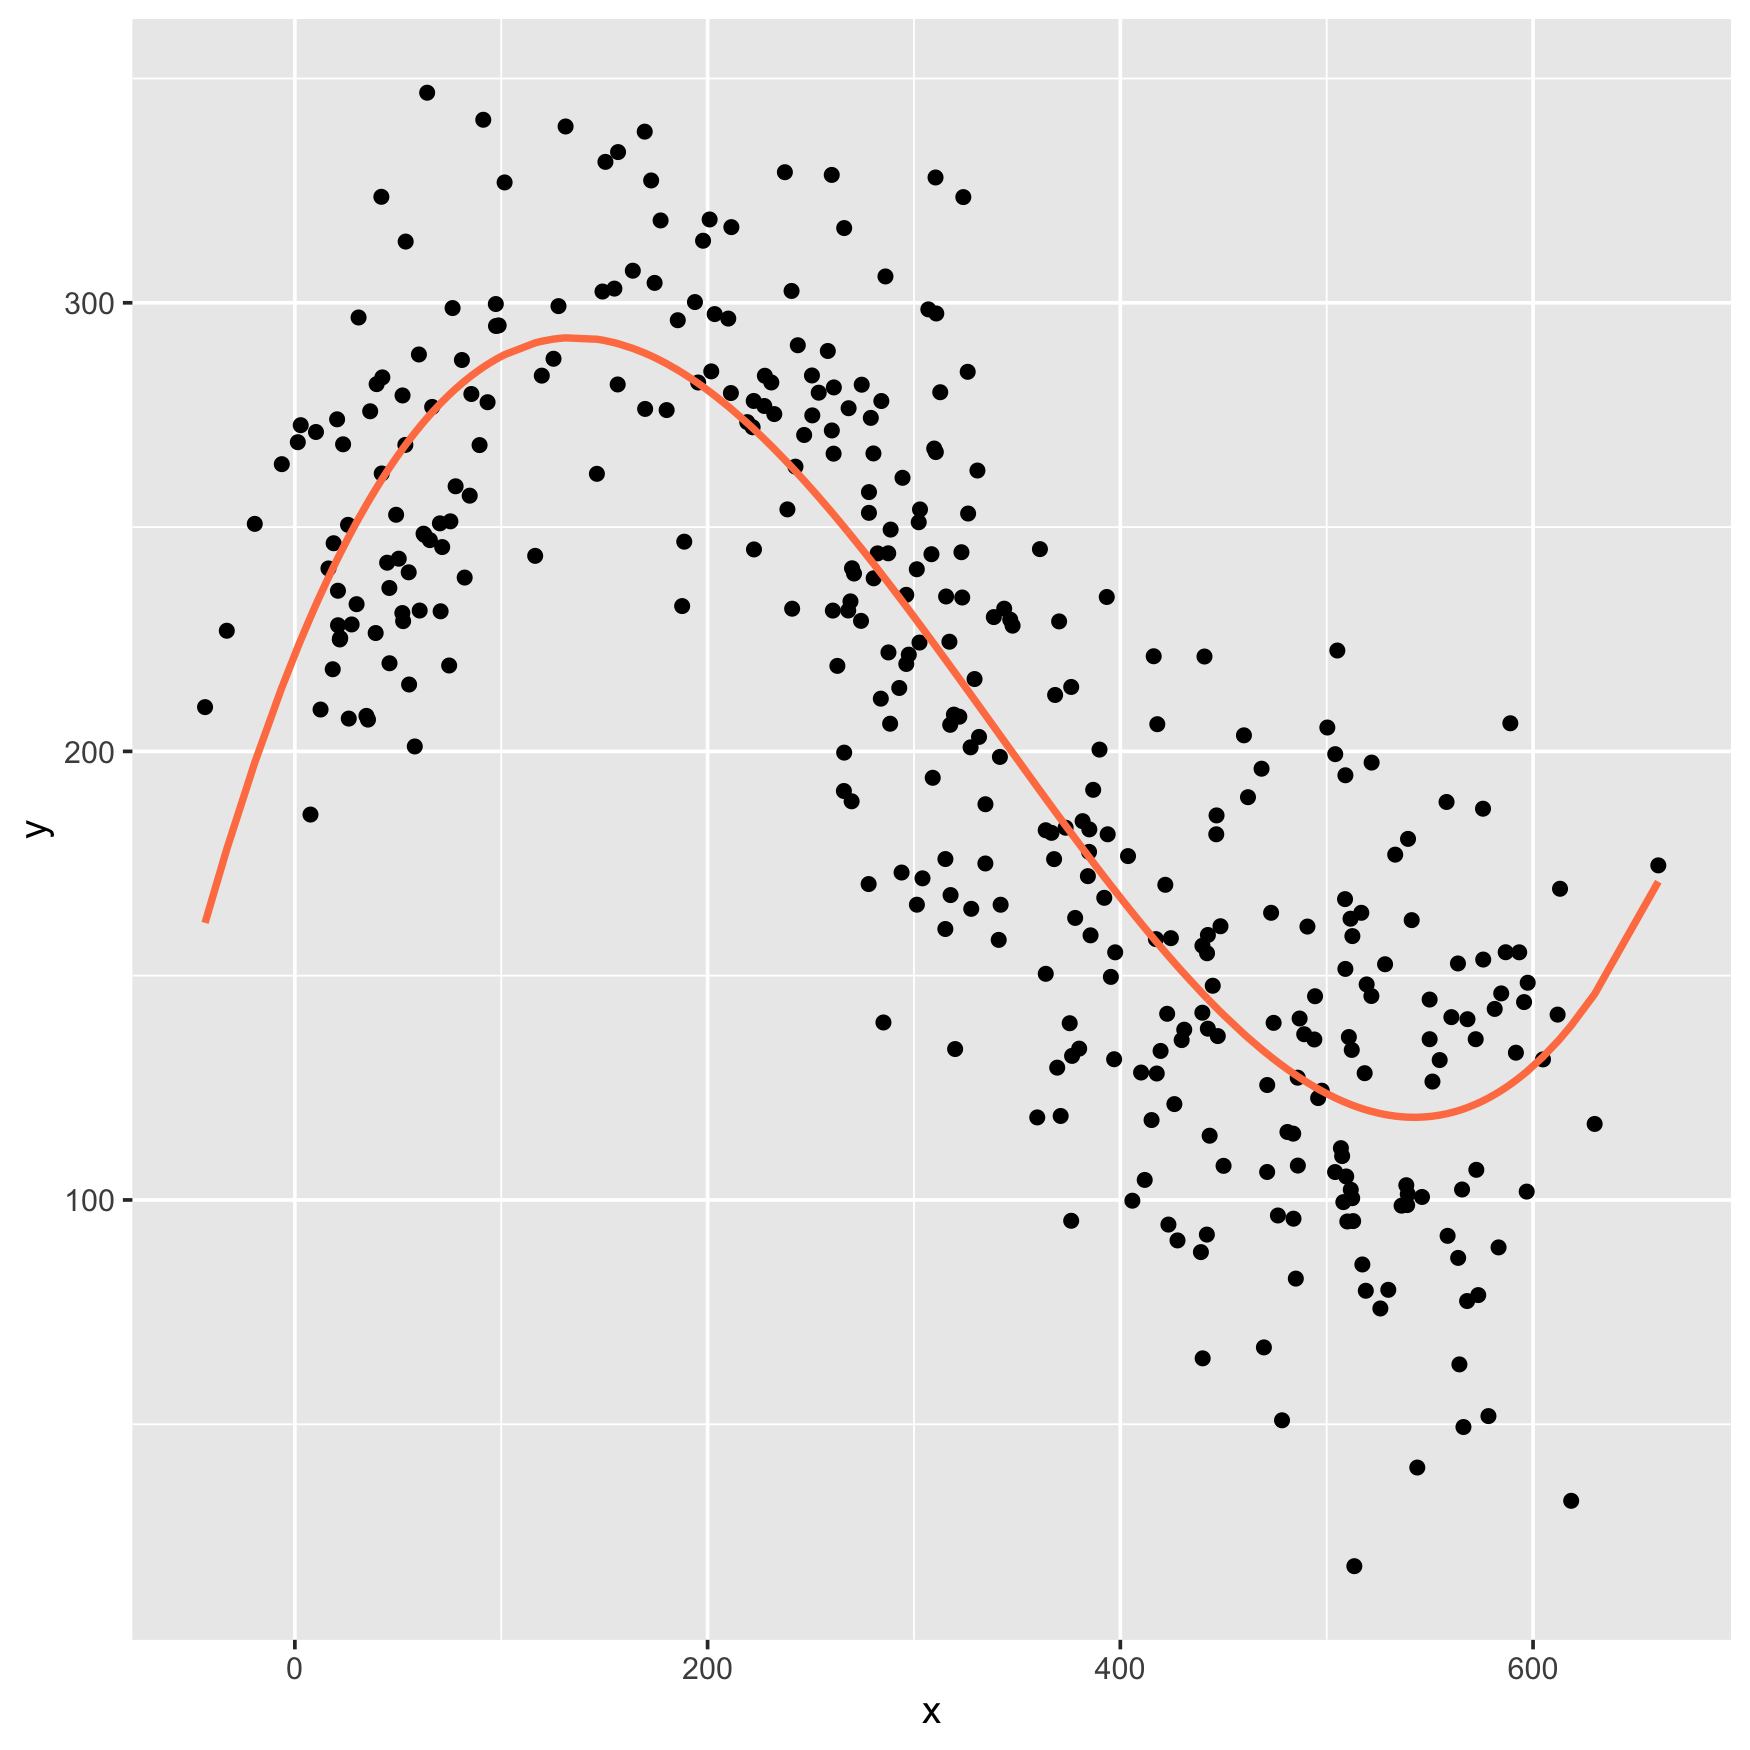

In [10]:
mod = lm(y ~ x + I(x^2) + I(x^3), data = fake_data2)

fake_data2 |>
    mutate(.pred = predict(mod, fake_data2)) |>
ggplot(aes(x = x, y = y)) + 
    geom_point() +
    geom_line(aes(y = .pred), color = 'coral', size = 1)

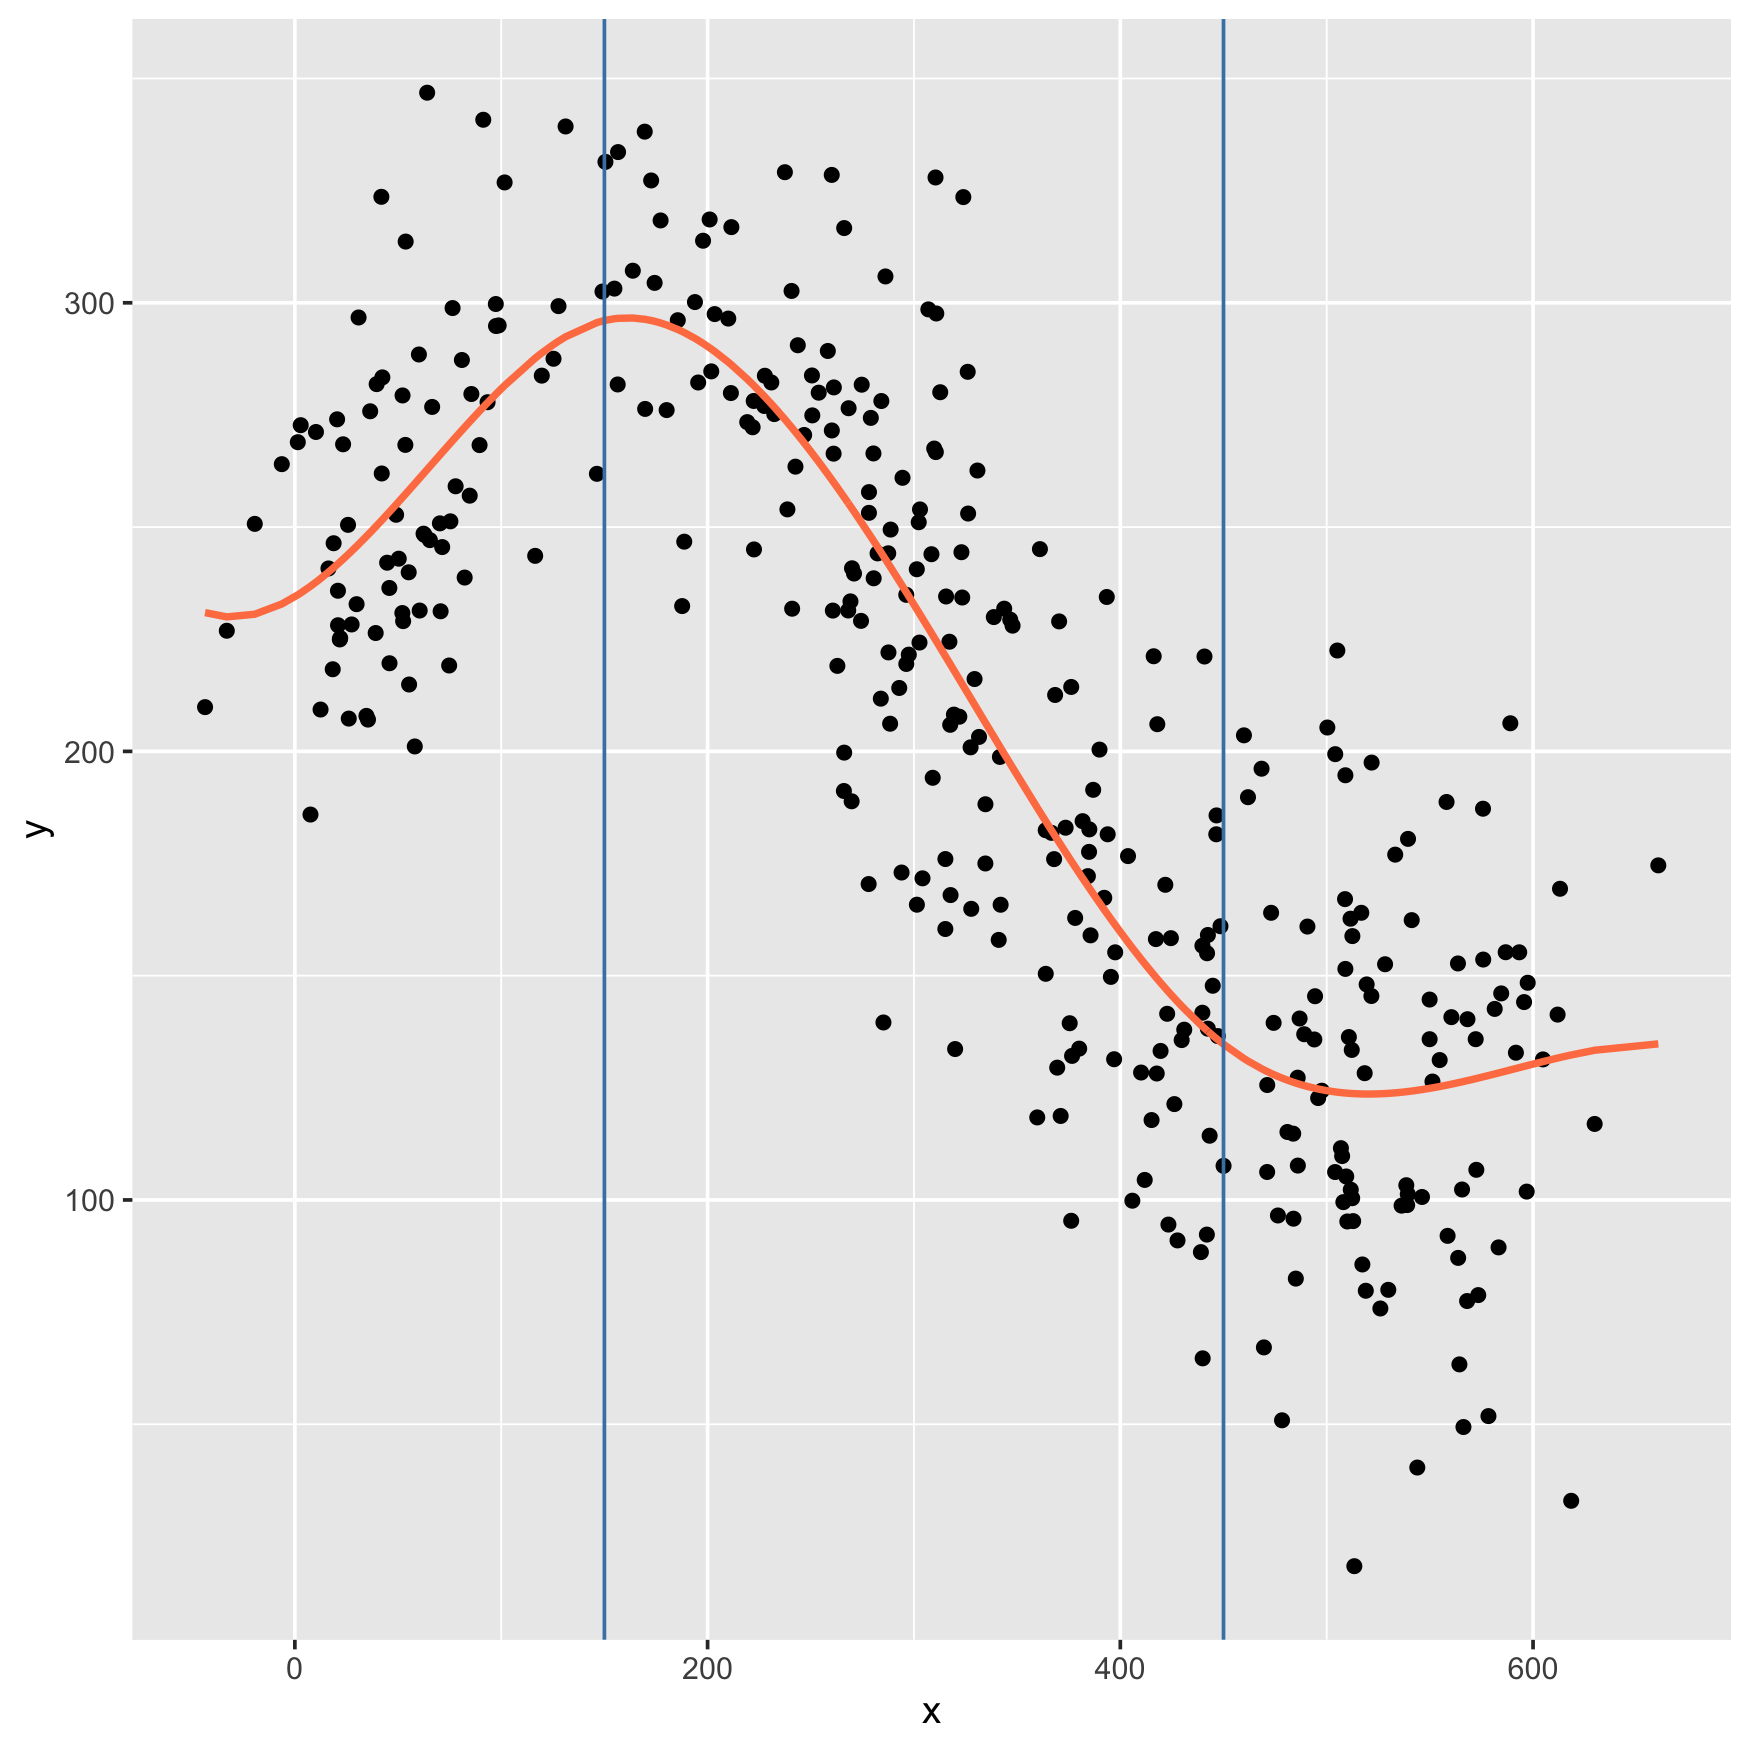

In [11]:
mod = lm(y ~ x + I(x^2) + I(x^3) + I((x-150)^3*(x>=150)) + I((x-450)^3*(x>=450)), data = fake_data2)

fake_data2 |>
    mutate(.pred = predict(mod, fake_data2)) |>
ggplot(aes(x = x, y = y)) + 
    geom_point() +
    geom_line(aes(y = .pred), color = 'coral', size = 1) +
    geom_vline(xintercept = 150, color = 'steelblue') +
    geom_vline(xintercept = 450, color = 'steelblue')

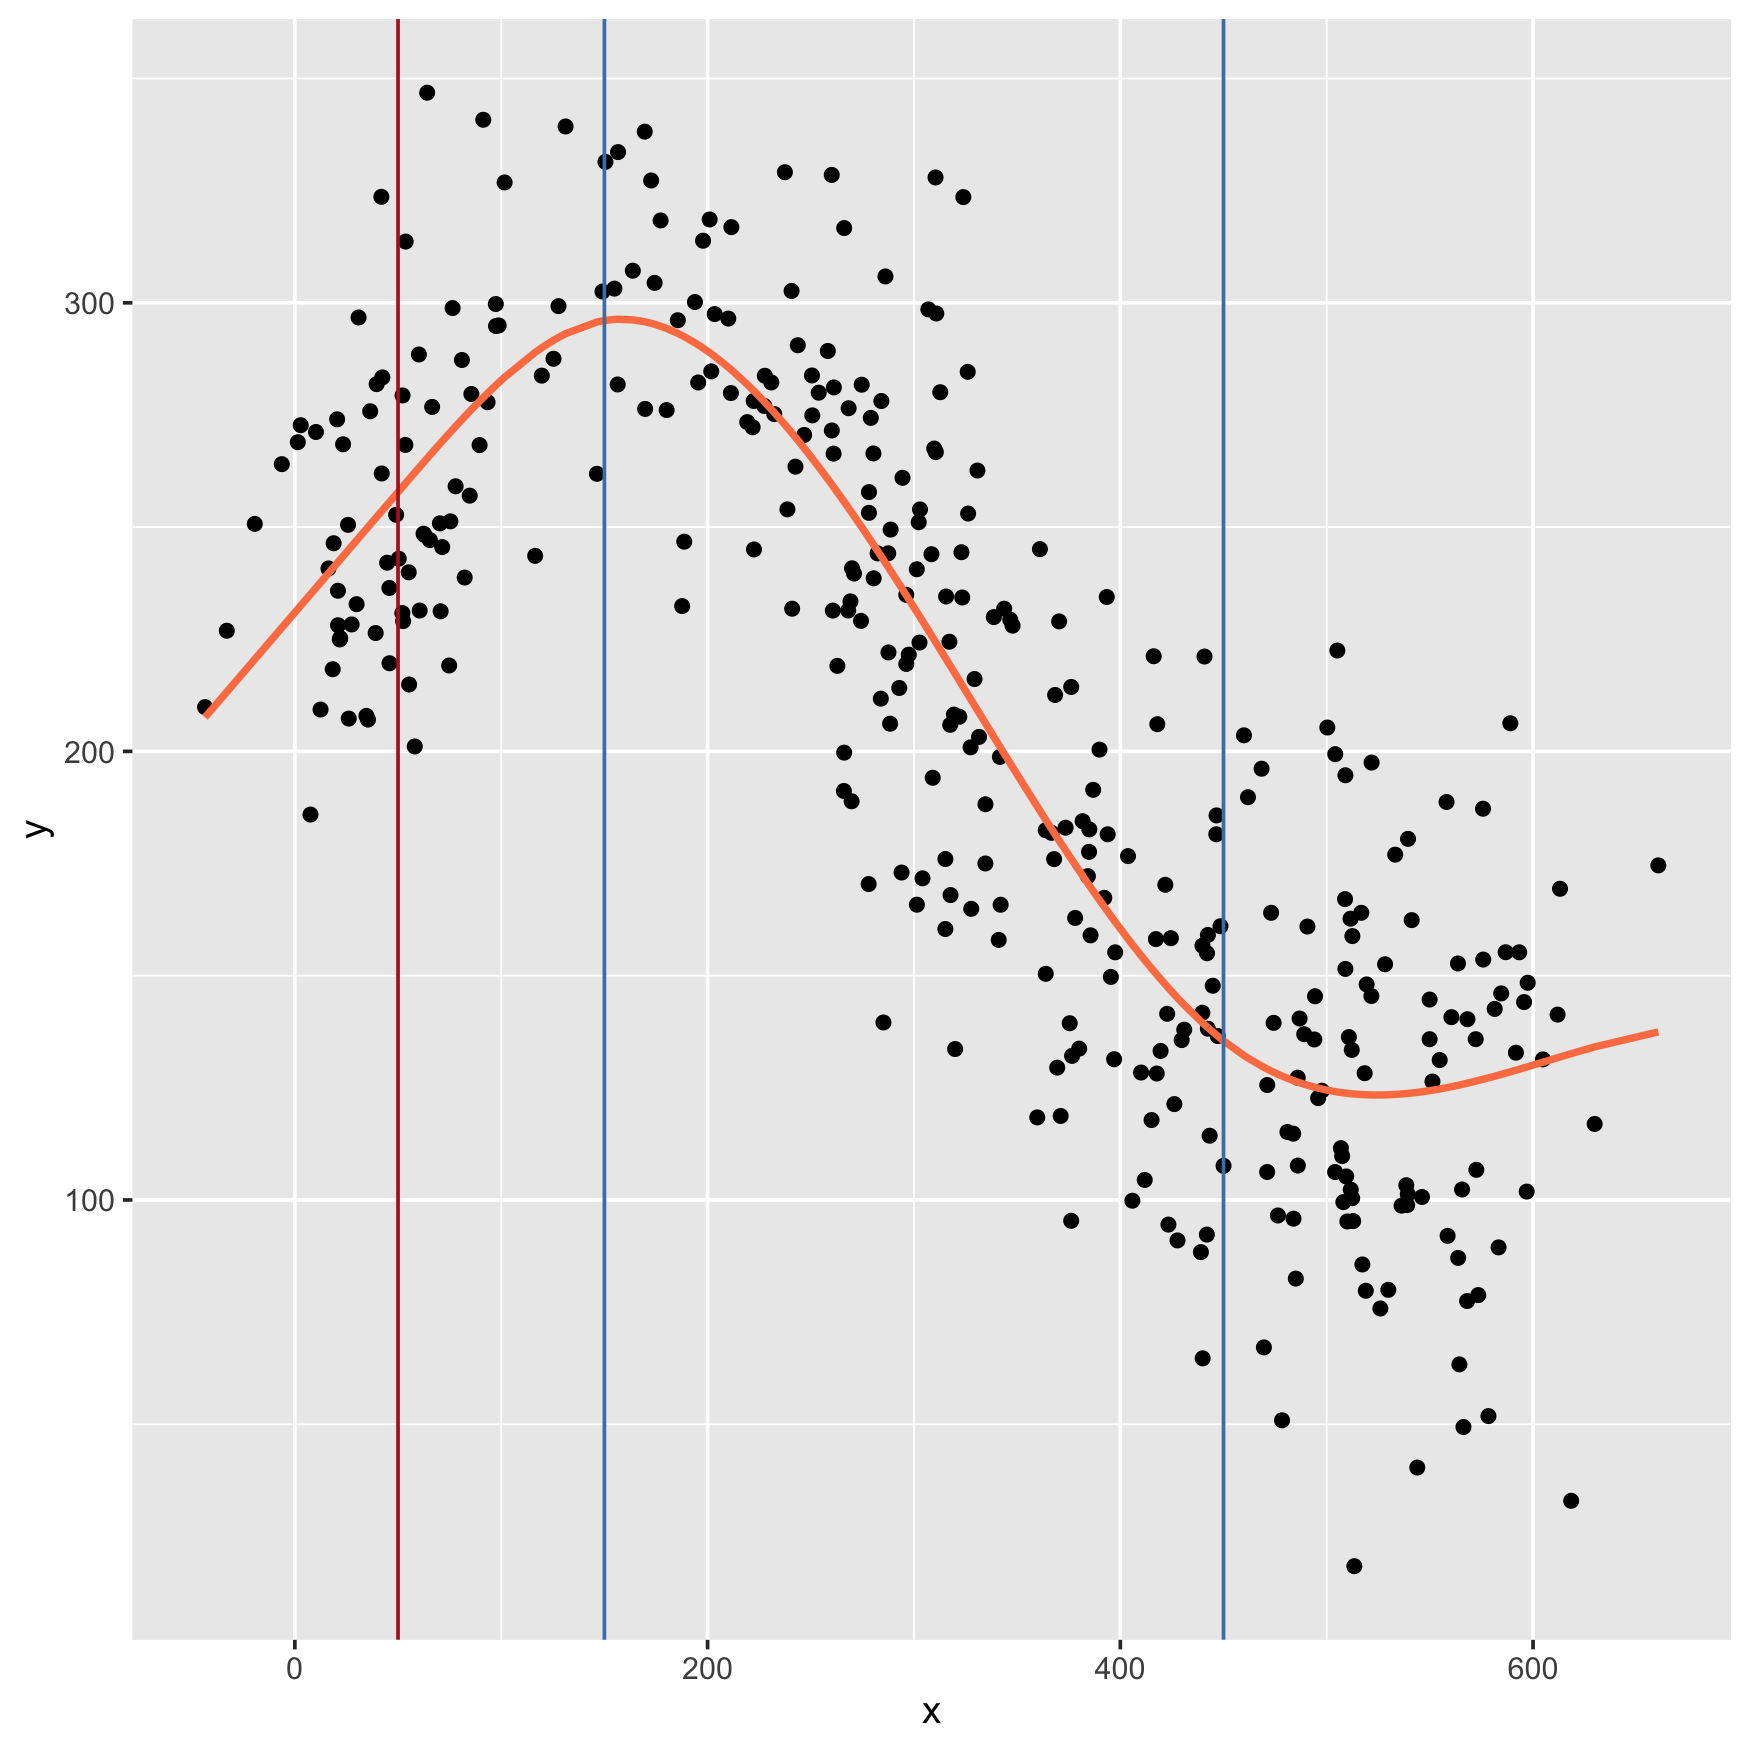

In [12]:
mod = lm(y ~ x + I((x-50)^3*(x>=50)) + I((x-150)^3*(x>=150)) + I((x-450)^3*(x>=450)) + I((x-450)^3*(x>=450)), 
         data = fake_data2)

fake_data2 |>
    mutate(.pred = predict(mod, fake_data2)) |>
ggplot(aes(x = x, y = y)) + 
    geom_point() +
    geom_line(aes(y = .pred), color = 'coral', size = 1) +
    geom_vline(xintercept = 50, color = 'firebrick') +
    geom_vline(xintercept = 150, color = 'steelblue') +
    geom_vline(xintercept = 450, color = 'steelblue')

In [13]:
# num_knots = deg_free - 1, degree = 3 because cubic

rec = recipe(y ~ x, data = fake_data2) |>
    step_ns(x, deg_free = 3) |>
    prep()

rec |> juice() |> head()

y,x_ns_1,x_ns_2,x_ns_3
<dbl>,<dbl>,<dbl>,<dbl>
240.7770,-0.06212357,0.1724127,-0.1081477
207.9136,-0.07835607,0.2230595,-0.1399164
228.2944,-0.07227372,0.2035240,-0.1276625
226.3843,-0.08198896,0.2351464,-0.1474980
214.9069,-0.09384157,0.2777298,-0.1742088
283.3720,-0.08452003,0.2437907,-0.1529202


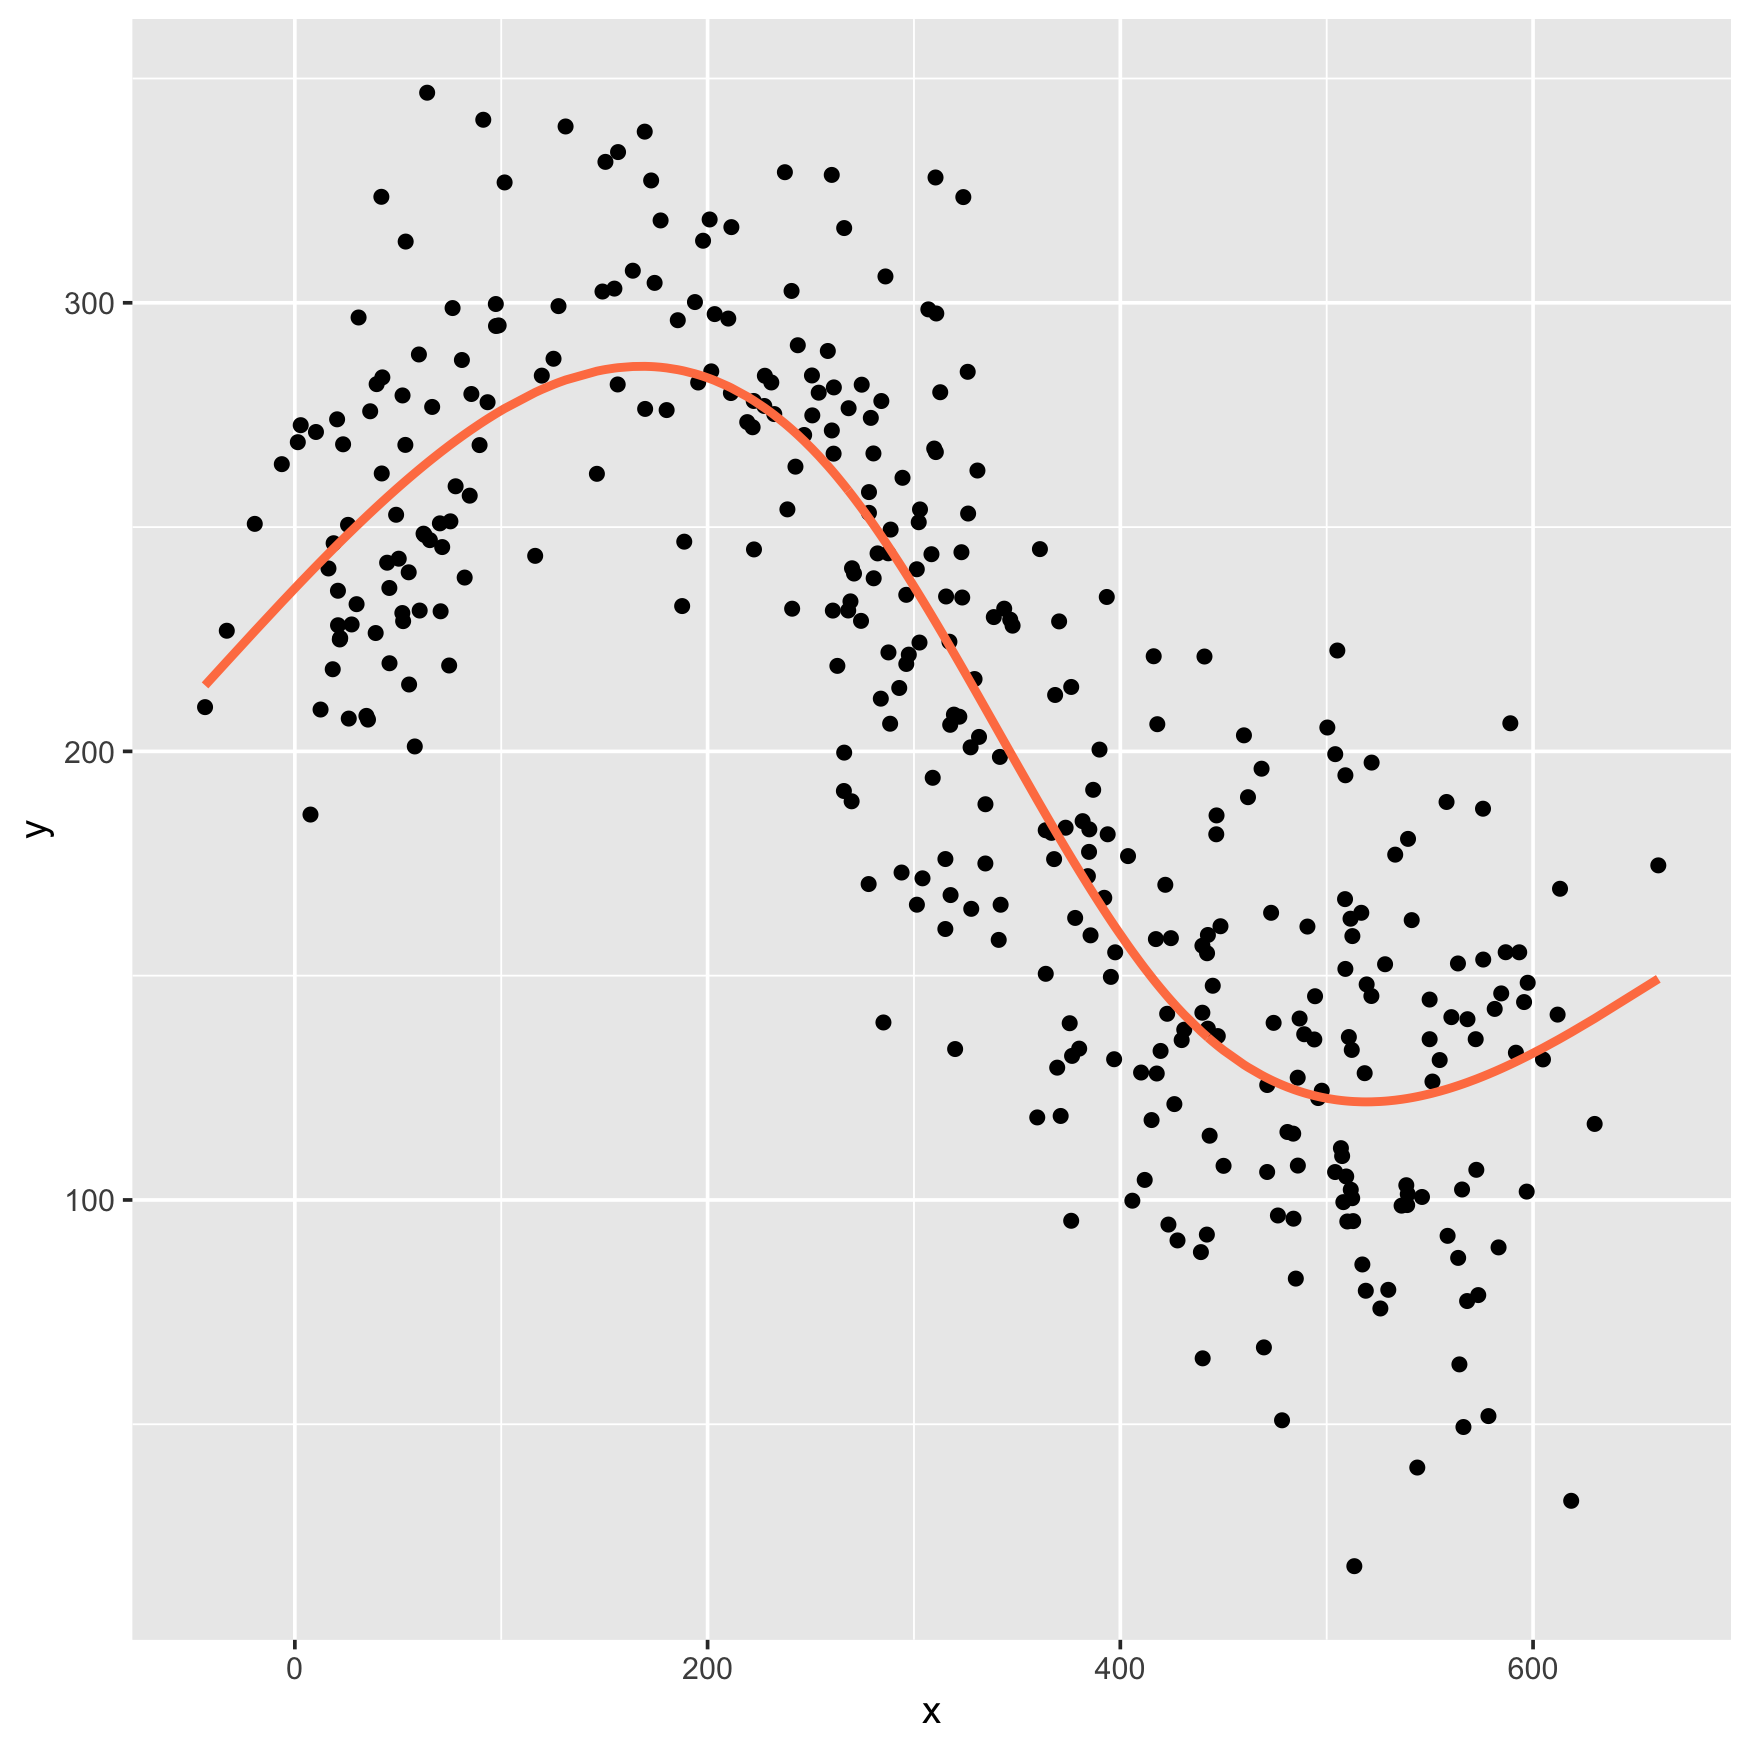

In [14]:
mod = linear_reg() |> set_engine('lm')

mod_fit = mod |> fit(y ~ ., data = rec |> juice())

predict(mod_fit, rec |> juice()) |> 
    bind_cols(fake_data2) |> 
ggplot(aes(x = x, y = y)) +
    geom_point() +
    geom_line(aes(y = .pred), linewidth = 1.2, color = 'coral')